In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model

In [2]:
start = '2010-01-01'
end = '2022-5-1'

df = data.DataReader('GOOG', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,311.532288,308.832428,311.208527,308.832428,2448744.0,308.832428
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735


In [3]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-25,2465.560059,2375.385010,2388.590088,2465.000000,1726100.0,2465.000000
2022-04-26,2455.000000,2383.237061,2455.000000,2390.120117,2469700.0,2390.120117
2022-04-27,2350.000000,2262.485107,2287.459961,2300.409912,3111900.0,2300.409912
2022-04-28,2408.770020,2302.877930,2342.300049,2388.229980,1839500.0,2388.229980
2022-04-29,2379.199951,2293.879883,2351.560059,2299.330078,1683500.0,2299.330078


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,311.532288,308.832428,311.208527,308.832428,2448744.0,308.832428
1,2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2,2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
3,2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
4,2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735


In [5]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3099,2022-04-25,2465.560059,2375.385010,2388.590088,2465.000000,1726100.0,2465.000000
3100,2022-04-26,2455.000000,2383.237061,2455.000000,2390.120117,2469700.0,2390.120117
3101,2022-04-27,2350.000000,2262.485107,2287.459961,2300.409912,3111900.0,2300.409912
3102,2022-04-28,2408.770020,2302.877930,2342.300049,2388.229980,1839500.0,2388.229980
3103,2022-04-29,2379.199951,2293.879883,2351.560059,2299.330078,1683500.0,2299.330078


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,High,Low,Open,Close,Volume
0,311.532288,308.832428,311.208527,308.832428,2448744.0
1,313.579620,310.954468,312.304413,312.204773,3927065.0
2,312.747742,309.609497,312.418976,310.829926,6031925.0
3,311.761444,302.047852,311.761444,302.994293,7987226.0
4,303.861053,295.218445,303.562164,295.940735,12876685.0


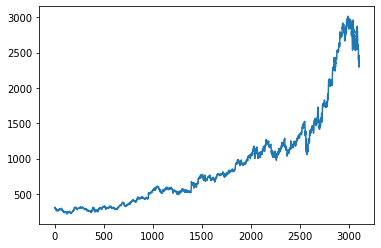

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,311.532288,308.832428,311.208527,308.832428,2448744.0
1,313.579620,310.954468,312.304413,312.204773,3927065.0
2,312.747742,309.609497,312.418976,310.829926,6031925.0
3,311.761444,302.047852,311.761444,302.994293,7987226.0
4,303.861053,295.218445,303.562164,295.940735,12876685.0
...,...,...,...,...,...
3099,2465.560059,2375.385010,2388.590088,2465.000000,1726100.0
3100,2455.000000,2383.237061,2455.000000,2390.120117,2469700.0
3101,2350.000000,2262.485107,2287.459961,2300.409912,3111900.0
3102,2408.770020,2302.877930,2342.300049,2388.229980,1839500.0


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3099    2747.336514
3100    2742.914114
3101    2737.162913
3102    2732.541113
3103    2726.775115
Name: Close, Length: 3104, dtype: float64

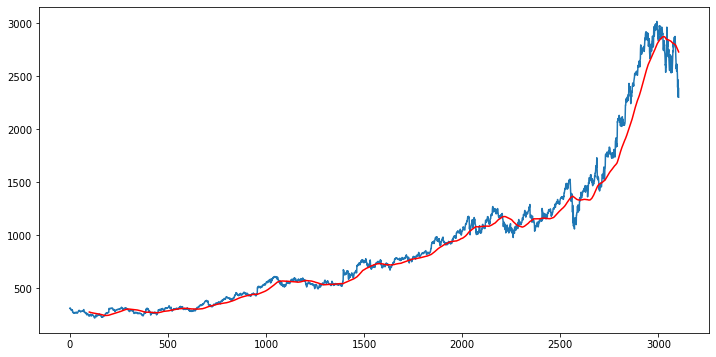

In [10]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3099    2783.219308
3100    2782.113508
3101    2780.516108
3102    2779.249009
3103    2777.619009
Name: Close, Length: 3104, dtype: float64

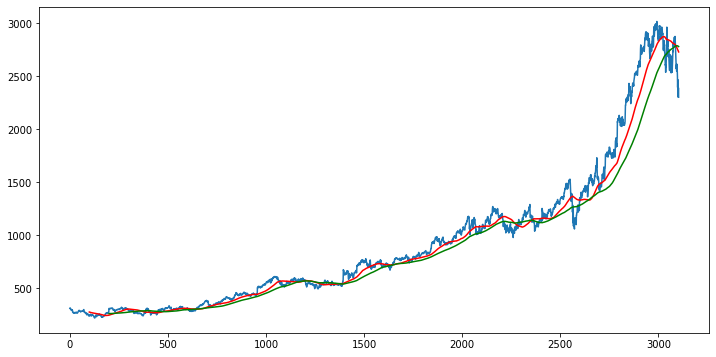

In [12]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(3104, 5)

In [14]:
#Splitting Data into Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2172, 1)
(932, 1)


In [15]:
 data_training.head()

,Close
0,308.832428
1,312.204773
2,310.829926
3,302.994293
4,295.940735


In [16]:
data_testing.head()

,Close
2172,1200.959961
2173,1207.770020
2174,1201.619995
2175,1207.329956
2176,1205.380005


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.08715709],
       [0.09036546],
       [0.08905746],
       ...,
       [0.97504543],
       [0.94867331],
       [0.94116694]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))

In [22]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train,  y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 16s 183ms/step - loss: 0.0310
Epoch 2/50
65/65 [==============================] - 12s 181ms/step - loss: 0.0060
Epoch 3/50
65/65 [==============================] - 12s 192ms/step - loss: 0.0063
Epoch 4/50
65/65 [==============================] - 13s 194ms/step - loss: 0.0054
Epoch 5/50
65/65 [==============================] - 12s 185ms/step - loss: 0.0046
Epoch 6/50
65/65 [==============================] - 12s 182ms/step - loss: 0.0047
Epoch 7/50
65/65 [==============================] - 12s 181ms/step - loss: 0.0042
Epoch 8/50
65/65 [==============================] - 12s 184ms/step - loss: 0.0045
Epoch 9/50
65/65 [==============================] - 12s 181ms/step - loss: 0.0043
Epoch 10/50
65/65 [==============================] - 12s 189ms/step - loss: 0.0042
Epoch 11/50
65/65 [==============================] - 12s 184ms/step - loss: 0.0036
Epoch 12/50
65/65 [==============================] - 12s 184ms/step - loss: 0.0035
Epoch 13/50
6

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

,Close
2172,1200.959961
2173,1207.770020
2174,1201.619995
2175,1207.329956
2176,1205.380005


In [25]:
past_100_days = data_training.tail(100)

In [26]:
final_df = past_100_days.append(data_training, ignore_index= True)

C:\Users\Home PC\AppData\Local\Temp\ipykernel_2160\1385604238.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_training, ignore_index= True)


In [27]:
final_df.head()

,Close
0,1005.099976
1,1004.559998
2,1031.790039
3,1006.469971
4,1013.409973


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.74956932],
       [0.7490556 ],
       [0.7749616 ],
       ...,
       [0.97504543],
       [0.94867331],
       [0.94116694]])

In [29]:
input_data.shape

(2272, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2172, 100, 1)
(2172,)


In [32]:
# Making Predictions

y_predicted = model.predict(x_test)

In [33]:
y_predicted.shape

(2172, 1)

In [34]:
y_predicted

array([[0.90009236],
       [0.8943597 ],
       [0.8805623 ],
       ...,
       [0.89710224],
       [0.89855397],
       [0.89963996]], dtype=float32)

In [35]:
scaler = scaler.scale_

In [36]:
scale_factor = 1/scaler[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

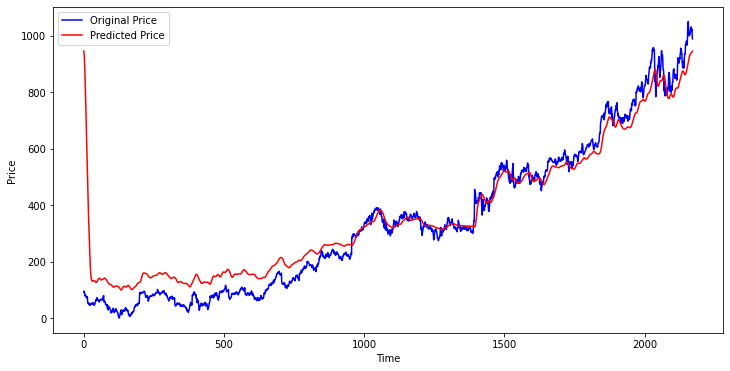

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()